<a href="https://colab.research.google.com/github/nmningmei/simple_tensorflow_logistic_regression_classifier/blob/main/simple_logistic_regression_implemented_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
if not os.path.exists("/content/simple_tensorflow_logistic_regression_classifier"):
    !git clone https://github.com/nmningmei/simple_tensorflow_logistic_regression_classifier.git

os.chdir("/content/simple_tensorflow_logistic_regression_classifier")

In [ ]:
ls

LICENSE  __pycache__/  README.md  temp.h5  test.py  utils.py


In [ ]:
import numpy as np
import tensorflow as tf
from utils import (build_logistic_regression,
                   compile_logistic_regression)
from tensorflow.keras import regularizers
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

# experiment control

In [ ]:
n_epochs = int(1e3) # just a large number
print_train = True

# clear memory states

In [ ]:
tf.keras.backend.clear_session()

# generate random test data

In [ ]:
X,y = make_classification(n_samples             = 150,
                         n_features            = 100,
                         n_informative         = 3,
                         n_redundant           = 10,
                         n_classes             = 2,
                         n_clusters_per_class  = 4,
                         flip_y                = .01,
                         class_sep             = .5,# how easy to separate the two classes
                         shuffle               = True,
                         random_state          = 12345,
                         )

# one-hot encoding for softmax

In [ ]:
y = y.reshape((-1,1))
y = np.hstack([y,1-y])

# split the data into train, validation, and test

In [ ]:
X_train,X_test,y_train,y_test   = train_test_split(X,y,test_size = .1,random_state = 12345)
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size = .1,random_state = 12345)
# add some 0.5 labeled data - don't use too much
X_noise = np.random.normal(X_train.mean(),X_train.std(),size = (int(X_train.shape[0]/2),100))
y_noise = np.array([[0.5,0.5]] * int(X_train.shape[0]/2))
X_train = np.concatenate([X_train,X_noise])
y_train = np.concatenate([y_train,y_noise])

# X_noise = np.random.normal(X_test.mean(),X_test.std(),size = (int(X_test.shape[0]/2),100))
# y_noise = np.array([[0.5,0.5]] * int(X_test.shape[0]/2))
# X_test  = np.concatenate([X_test,X_noise])
# y_test  = np.concatenate([y_test,y_noise])

# build the model

In [ ]:
tf.random.set_seed(12345)
logistic_regression = build_logistic_regression(
                        input_size              = X_train.shape[1],
                        output_size             = 2,
                        special                 = False,
                        kernel_regularizer      = regularizers.L2(l2 = 1e-2),
                        activity_regularizer    = regularizers.L1(l1 = 1e-32), # this makes the prediction sparse
                        print_model             = True,
                        )

Model: "logistic_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100)]             0         
                                                                 
 logistic_layer (Dense)      (None, 2)                 202       
                                                                 
Total params: 202
Trainable params: 202
Non-trainable params: 0
_________________________________________________________________
None


# compile the model

In [ ]:
logistic_regression,callbacks = compile_logistic_regression(
                                logistic_regression,
                                model_name      = 'temp.h5',
                                optimizer       = None,
                                loss_function   = None,
                                metric          = None,
                                callbacks       = None,
                                learning_rate   = 1e-3,
                                tol             = 1e-4,
                                patience        = 10,
                                )

# train and validate the model

In [ ]:
logistic_regression.fit(
                        X_train,
                        y_train,
                        batch_size      = 4,
                        epochs          = n_epochs,
                        verbose         = print_train,
                        callbacks       = callbacks,
                        validation_data = (X_valid,y_valid),
                        shuffle         = True,
                        class_weight    = {0:1,1:2},# tf has this but I don't think it is the same as sklearn
                        )
y_pred = logistic_regression.predict(X_test)

Epoch 1/1000
46/46 [==============================] - 1s 8ms/step - loss: 1.2658 - auc: 0.4931 - val_loss: 1.0810 - val_auc: 0.4490
Epoch 2/1000
46/46 [==============================] - 0s 3ms/step - loss: 1.2471 - auc: 0.5016 - val_loss: 1.0710 - val_auc: 0.4439
Epoch 3/1000
46/46 [==============================] - 0s 3ms/step - loss: 1.2291 - auc: 0.5102 - val_loss: 1.0615 - val_auc: 0.4388
Epoch 4/1000
46/46 [==============================] - 0s 3ms/step - loss: 1.2119 - auc: 0.5175 - val_loss: 1.0523 - val_auc: 0.4337
Epoch 5/1000
46/46 [==============================] - 0s 3ms/step - loss: 1.1950 - auc: 0.5268 - val_loss: 1.0436 - val_auc: 0.4388
Epoch 6/1000
46/46 [==============================] - 0s 3ms/step - loss: 1.1790 - auc: 0.5356 - val_loss: 1.0362 - val_auc: 0.4388
Epoch 7/1000
46/46 [==============================] - 0s 3ms/step - loss: 1.1630 - auc: 0.5432 - val_loss: 1.0281 - val_auc: 0.4388
Epoch 8/1000
46/46 [==============================] - 0s 3ms/step - loss: 1.

In [ ]:
print(f'test score = {roc_auc_score(y_test,y_pred,):.4f}')

test score = 0.6481


# visualize the distribution of the predictions

In [ ]:
print(y_test)
print(y_pred)

[[0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]]
[[0.5717424  0.42825764]
 [0.25801748 0.7419825 ]
 [0.01492926 0.9850707 ]
 [0.968661   0.03133904]
 [0.2590448  0.7409551 ]
 [0.6795     0.3205    ]
 [0.79624325 0.20375675]
 [0.60854    0.39145997]
 [0.95375675 0.04624325]
 [0.24453911 0.7554609 ]
 [0.9715366  0.02846345]
 [0.40048546 0.59951454]
 [0.12197227 0.8780278 ]
 [0.937617   0.062383  ]
 [0.7587101  0.24128997]]


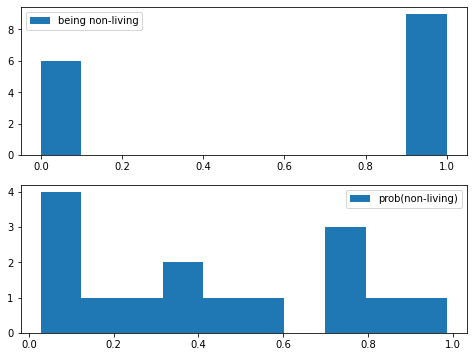

In [ ]:
fig,axes = plt.subplots(figsize = (8,6),
                        nrows = 2,
                        )
ax = axes.flatten()[0]
ax.hist(y_test[:,-1],label = 'being non-living')
ax.legend()
ax = axes.flatten()[1]
ax.hist(y_pred[:,-1],label = 'prob(non-living)')
ax.legend()